# SoundVision 👁️
##### My Github:ARSALANnam(Echolyno)
##### My Email: arsalannam9710@gmail.com
##### My Linkedin:www.linkedin.com/in/arsalannam

## This project is a Music Genre Classifier built with Deep Learning (Keras & TensorFlow) using the features_3_sec.csv dataset (extracted from the GTZAN dataset). The model achieves around 91% accuracy on the test set.

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import cv2 : Imports the OpenCV library, which is used for image processing operations such as reading, writing, and converting images.

import pandas : Used for loading and manipulating datasets (CSV, DataFrames).

import numpy : Provides numerical operations and array handling.

import matplotlib.pyplot : For plotting graphs (e.g., accuracy/loss curves).

import seaborn : For advanced visualization (e.g., heatmap of the confusion matrix).

from sklearn.metrics import confusion_matrix : To compute the confusion matrix for evaluation.

from sklearn.model_selection import train_test_split : To split the dataset into training and testing sets.

from sklearn.preprocessing import LabelEncode : Converts categorical labels (genres) into numeric values.

from sklearn.preprocessing import StandardScaler : Normalizes/standardizes feature values for better training.

## Read CSV

In [3]:
df = pd.read_csv("features_3_sec.csv")

# preprocessing

In [4]:
X = df.drop(columns=["filename", "length", "label"])
y = df["label"]

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y) 

# Train, Test, Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Definition

In [9]:
model = Sequential([
    Dense(1024, activation="relu", input_shape=(X.shape[1],)),
    Dropout(0.4),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(y.shape[1], activation="softmax")
])

## Compile

In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Fit

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


2025-09-24 18:03:35.435297: I external/local_xla/xla/service/service.cc:163] XLA service 0x7cdaf00022d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-24 18:03:35.435327: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-09-24 18:03:35.460231: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-24 18:03:35.631943: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91200
2025-09-24 18:03:35.775863: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-24 18:03:35.

 73/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1958 - loss: 2.2209

I0000 00:00:1758724420.764208   24321 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


177/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2612 - loss: 2.0361

2025-09-24 18:03:41.431376: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-24 18:03:41.431439: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-24 18:03:42.368424: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1315', 16 bytes spill stores, 16 bytes spill loads



200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2721 - loss: 2.0066

2025-09-24 18:03:45.266786: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-09-24 18:03:45.461541: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_98', 20 bytes spill stores, 20 bytes spill loads

2025-09-24 18:03:45.765312: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 8 bytes spill stores, 8 bytes spill loads

2025-09-24 18:03:47.122485: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does

200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.3634 - loss: 1.7606 - val_accuracy: 0.5679 - val_loss: 1.2173
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5376 - loss: 1.3273 - val_accuracy: 0.6873 - val_loss: 0.9636
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 1.1255 - val_accuracy: 0.7261 - val_loss: 0.8296
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6767 - loss: 0.9865 - val_accuracy: 0.7467 - val_loss: 0.7643
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7033 - loss: 0.9063 - val_accuracy: 0.7686 - val_loss: 0.6864
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7331 - loss: 0.8198 - val_accuracy: 0.7742 - val_loss: 0.6624
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7518 - loss: 0.7689 - val_accuracy: 0.8018 - val_loss: 0.6033
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7738 - loss: 0.7036 - val_accuracy: 0.79

# Model Evaluate

In [12]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", acc)

2025-09-24 18:05:02.997681: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_91', 8 bytes spill stores, 8 bytes spill loads



Test Accuracy: 0.9169169068336487


# Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


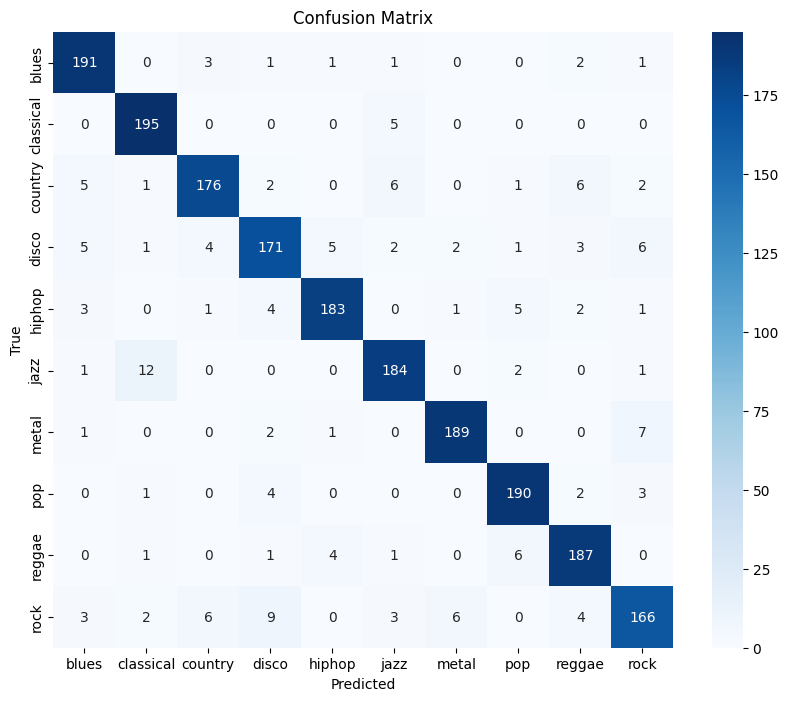

In [13]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accuracy & Loss

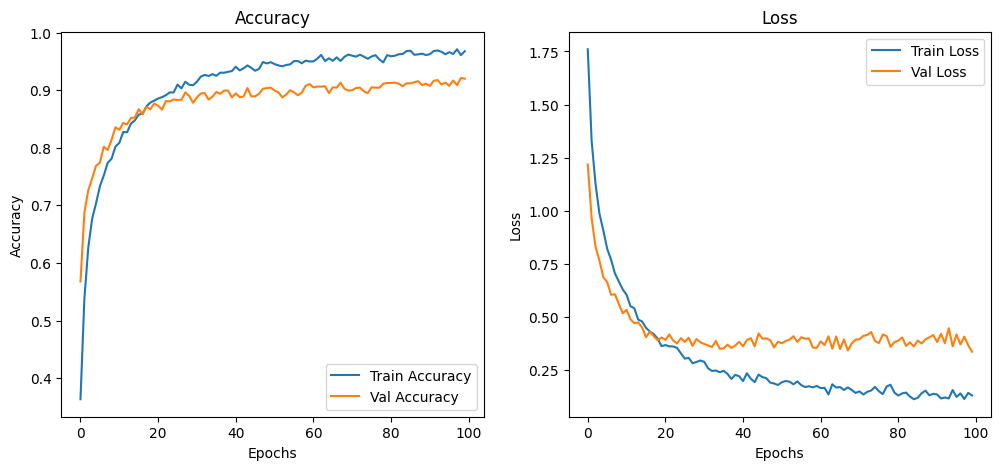

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# Thank you for your Support 🤗